# Visualize the Model and Output

This notebook uses python to visualize the model and the MCMC output from [archery-mcmc.ipynb](https://github.com/phyloworks/revbayes-workshop2017/blob/master/archery-model/archery-mcmc.ipynb). In the future, we will be able to integrate python or R visualization with the RevBayes commands. 

## View the Model DAG using graphviz

To use graphviz in python you must first install the graphviz python package: https://pypi.python.org/pypi/graphviz. Ocne that is installed, then import the graphviz pacage.

In [1]:
import graphviz as gv

Read in the model from file

In [2]:
f = open('archery_model.dot','r')
ds = f.read()
f.close()

Pass the graph to graphviz and display the graph.

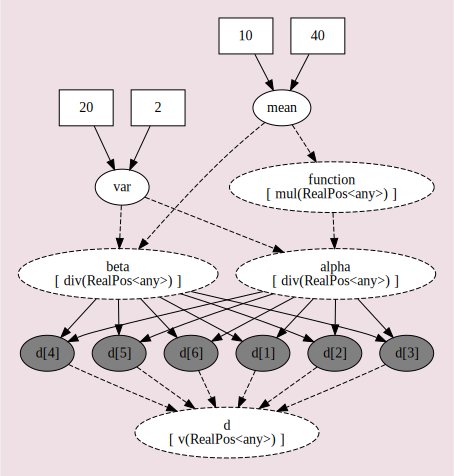

In [3]:
s = gv.Source(ds)
s

## Visualize MCMC Output

We will load the log file as a pandas Dataframe. Begin by importing the pandas package

In [4]:
import pandas as pd

Read the log file and create the dataframe variable with the `read_csv` function. We must tell this function what character acts as the separator.

In [5]:
log_df = pd.read_csv("archery_mcmc_1.log",sep='\t')

Import pacages to plot data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

### Plot the trace of the `mean` parameter

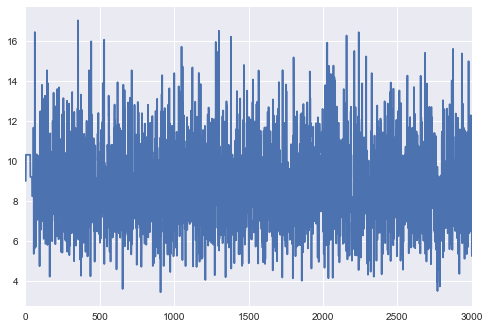

In [7]:
log_df['var'].plot()

### Posterior density plot and histogram of the `mean`

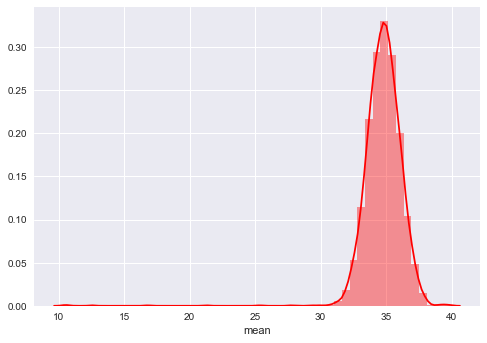

In [8]:
sns.distplot(log_df['mean'],color='red')

### Posterior density plot and histogram of the `var`

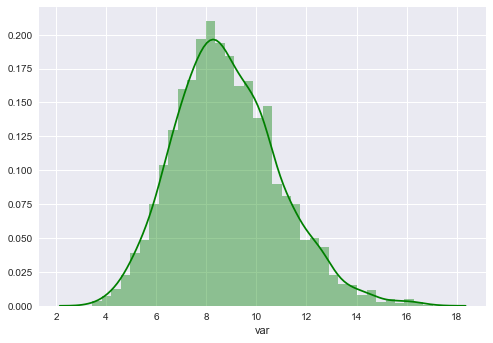

In [9]:
sns.distplot(log_df['var'],color='green')

### Joint density plot of `var` and `alpha`

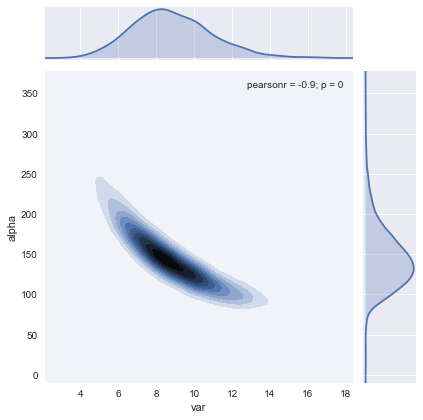

In [10]:
sns.jointplot(x="var", y="alpha", data=log_df, kind="kde");

### Posterior density plot and histogram of `alpha`

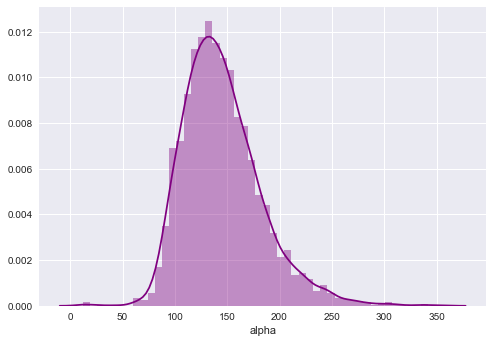

In [11]:
sns.distplot(log_df['alpha'],color='purple')

### Posterior density plot and histogram of `beta`

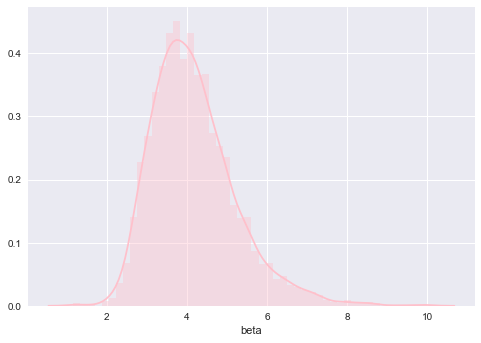

In [12]:
sns.distplot(log_df['beta'],color='pink')

### Ridgeline Plots!!!

In [13]:
import joypy

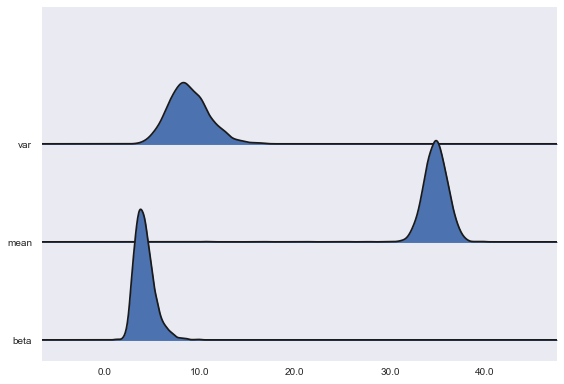

In [14]:
fig, axes = joypy.joyplot(log_df[['var','mean','beta']])